In [2]:
import cv2  # OpenCV for image processing
import numpy as np  # For numerical operations
from skimage import feature  # For edge detection (e.g., Canny)
from sklearn.neighbors import KDTree  # For efficient nearest neighbor search
from sklearn.metrics import precision_score, recall_score, average_precision_score
import pandas as pd  # For data manipulation (optional, but useful for organizing results)
import os
import random

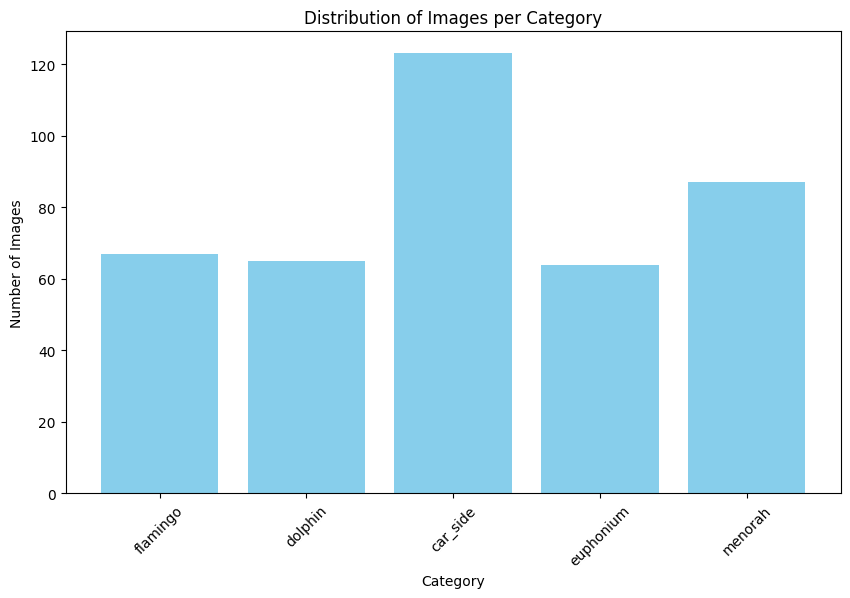

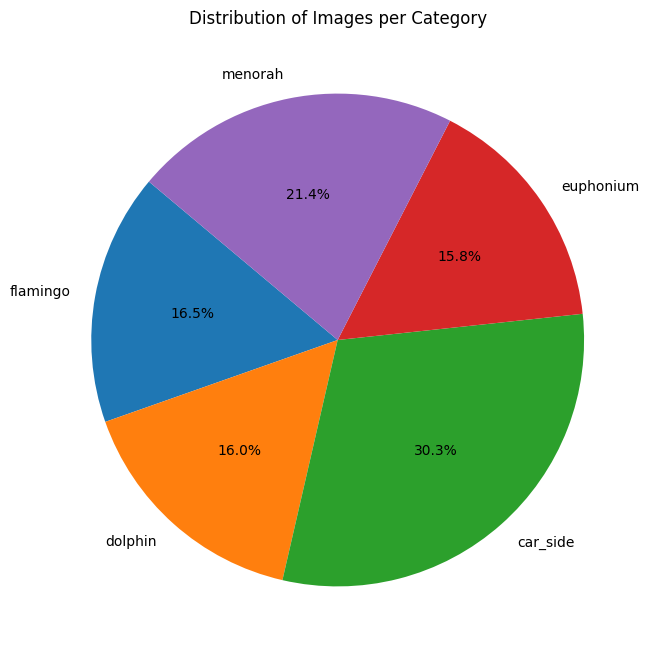

In [7]:
import os
import random
import shutil
import matplotlib.pyplot as plt

# Define the folder path
folder_path = r"C:/Users/asus/OneDrive/Desktop/CVassimgement/caltech-101/"
folder_contents = os.listdir(folder_path)
folder_names = [name for name in folder_contents if os.path.isdir(os.path.join(folder_path, name))]

# Select categories with at least 50 images
randomsa = []
for folder_name in folder_names:
    folder_contents = os.listdir(os.path.join(folder_path, folder_name))
    if len(folder_contents) >= 50:
        randomsa.append(folder_name)

# Select 5 random categories
selected_folders = random.sample(randomsa, 5)

# Create a new directory to organize the selected categories
organized_folder_path = r"C:/Users/asus/OneDrive/Desktop/CVassimgement/organized_caltech101/"
os.makedirs(organized_folder_path, exist_ok=True)

# Organize the selected categories into separate folders
for folder_name in selected_folders:
    src_folder = os.path.join(folder_path, folder_name)
    dest_folder = os.path.join(organized_folder_path, folder_name)
    os.makedirs(dest_folder, exist_ok=True)
    for file_name in os.listdir(src_folder):
        src_file = os.path.join(src_folder, file_name)
        dest_file = os.path.join(dest_folder, file_name)
        shutil.copy(src_file, dest_file)

# Analyze and plot the distribution of images per category
category_counts = {folder_name: len(os.listdir(os.path.join(organized_folder_path, folder_name))) for folder_name in selected_folders}

# Plotting the distribution using a bar graph
plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values(), color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Category')
plt.xticks(rotation=45)
plt.show()

# Plotting the distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images per Category')
plt.show()